# Project Three

https://classroom.github.com/a/feP-p3J8

#### Set-up

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import plotly as py
import plotly.graph_objs as go
from sklearn.decomposition import PCA

## Optical Character Recognition

As a prototypical image analysis and categorization task we look at identifying the correct digit (0..9) in digital images of handwritten digits. For this project we'll use the digits dataset built into sklearn. In future projects we will the use the MNIST data set of handwritten digits which consists of larger images (28x28 pixels) and contains more samples (>50000).

#### sklearn digits dataset

In [34]:
from sklearn.datasets import load_digits

### a) Describe and visualize the data, for example how many samples, feature and target  dimensionality?  Visualize some of the digits (<=100). 

In [35]:
#set the as a string
digits = load_digits()

In [36]:
print("Keys of the Dataset: \n{}".format(digits.keys()))

Keys of the Dataset: 
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [37]:
print("Description of the Dataset: \n{}".format(digits['DESCR']))

Description of the Dataset: 
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix o

In [38]:
print("Target Names of the Dataset: \n{}".format(digits['target_names']))

Target Names of the Dataset: 
[0 1 2 3 4 5 6 7 8 9]


In [39]:
print("Visualization of the Dataset: \n{}".format(digits['data']))

Visualization of the Dataset: 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


### b) How useful is it to graph the dependency of the target on each feature or a pair of features as we have done in previous projects?  Read in the textbook and in the sklearn documentation about dimensionality reduction using 

** Principal Component Analysis (PCA)**

* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
* http://scikit-learn.org/stable/modules/decomposition.html

and

** Manifold Learning ** 

* https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
* http://scikit-learn.org/stable/modules/manifold.html


Apply on example each of PCA and Manifold Learning to the digits data set. Keep two dimensions.

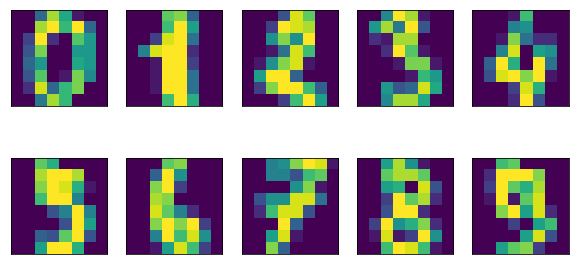

In [40]:

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)


In [41]:
#build a PCA model
pca = PCA(n_components = 2)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [42]:
digits_pca = pca.fit_transform(digits.data)
print("Original Shape: \n", digits.data.shape)
print("Transformed Shape: \n", digits_pca.shape)

Original Shape: 
 (1797, 64)
Transformed Shape: 
 (1797, 2)


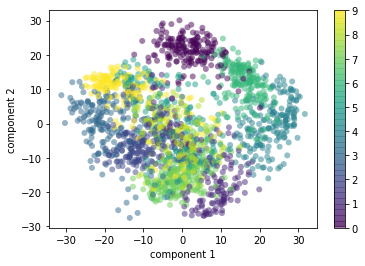

In [43]:
plt.scatter(digits_pca[:, 0], digits_pca[:, 1],c = digits.target, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

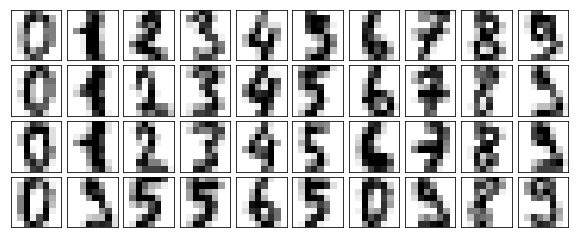

In [44]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [45]:
#continue on page 147

### c) Supervised Learning

Apply one of the methods we have looked at so far for supervised learning (for example Support Vector Machines, Decision Trees and Random Forests) to the digits problem. Use model validation and parameter searches as needed. How accurate is your model? Use appropriate measures to describe the accuracy of your model.

In [14]:
#Not restricting the Decision Tree's Depth. This can provide overestimation

In [57]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt

In [58]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [63]:
from sklearn.cross_validation import train_test_split

In [59]:
print(digits['target_names'])
print(digits['target'])

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 ... 8 9 8]


In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify = digits.target, random_state = 1)

In [66]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [67]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.842


In [ ]:
#Restricting the Decision Tree's Depth

In [68]:
Rtree = DecisionTreeClassifier(max_depth=9, random_state=0)
Rtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [69]:
print("Accuracy on training set: {:.3f}".format(Rtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(Rtree.score(X_test, y_test)))

Accuracy on training set: 0.952
Accuracy on test set: 0.840


In [ ]:
#Restricting the depth, the best results are produced at 9 layers. 

In [ ]:
#Now, we will visualize the Decision Tree

In [70]:
from sklearn.tree import export_graphviz

In [71]:
export_graphviz(Rtree, out_file = 'tree.dot')

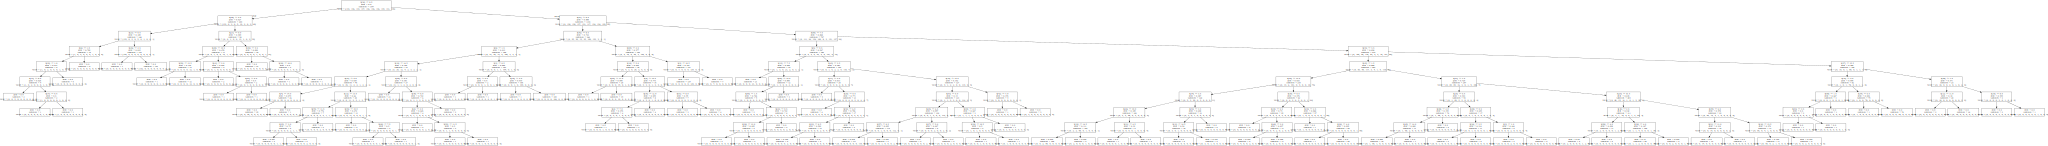

In [22]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [72]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.0016112  0.01894402 0.00977727 0.00082489 0.05186135
 0.00304576 0.         0.         0.01763473 0.0113219  0.00109986
 0.00079693 0.0226438  0.00160265 0.         0.         0.00693819
 0.00482943 0.03475581 0.03990859 0.0917576  0.         0.00160931
 0.00163437 0.00164979 0.05110854 0.04424956 0.04849944 0.01062982
 0.01733138 0.         0.         0.05764223 0.01069242 0.00430322
 0.07486807 0.02324625 0.00816017 0.         0.         0.00313822
 0.0764058  0.05119721 0.00333402 0.01597845 0.01179724 0.
 0.         0.         0.00943168 0.01040795 0.00909524 0.02178221
 0.02295283 0.         0.         0.         0.01094153 0.00082489
 0.05513221 0.0138351  0.0014141  0.00735273]


In [73]:
def plot_feature_importances_digits(model):
    n_features = digits.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

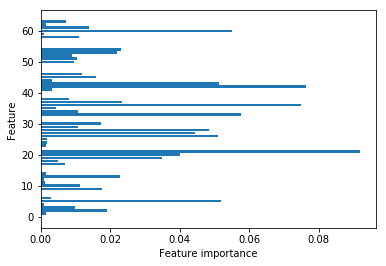

In [74]:
plot_feature_importances_digits(tree)

### d) Exploration: Unsupervised Learning

This part is optional. In supervised learning we use labelled data to train or build a model. In the case of the images of handwritten digits each image is label with the (hopefully) correct digit 0..9. Unsupervised learning tries to extract the fact that there are 10 different objects (the digits 0..9) from the images without knowing the labels. Learn in the textbook about

** k-means Clustering*

* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

and apply some of the techiques to the digits problem.

In [75]:
print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [77]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
#Continue on Pg. 134

In [78]:
X_train_scaled = scaler.transform(X_train)

In [84]:
print("Transformed Shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per feature maxmimum after scaling:\n {}".format(X_train_scaled.min(axis = 0)))
print("per feature minimum after scaling:\n {}".format(X_train_scaled.min(axis =0)))

Transformed Shape: (1347, 64)
per-feature minimum before scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum before scaling:
 [ 0.  8. 16. 16. 16. 16. 16. 15.  2. 16. 16. 16. 16. 16. 16. 10.  2. 16.
 16. 16. 16. 16. 16.  6.  1. 15. 16. 16. 16. 16. 15.  1.  0. 14. 16. 16.
 16. 16. 14.  0.  4. 16. 16. 16. 16. 16. 16.  6.  8. 16. 16. 16. 16. 16.
 16. 13.  1.  9. 16. 16. 16. 16. 16. 16.]
per feature maxmimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.

In [91]:
from sklearn.datasets import make_blobs
import mglearn

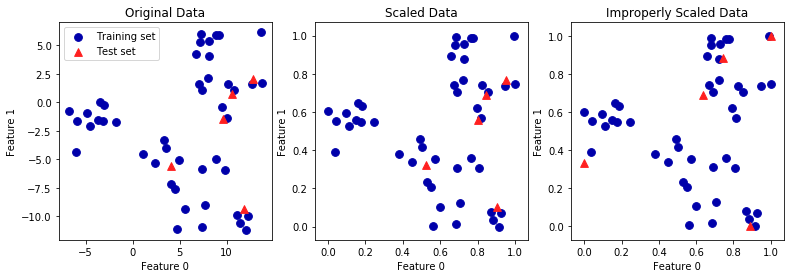

In [96]:
X, _ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std =2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

#Plotting The Training and Test Sets
axes[0].scatter(X_train[:, 0], X_train[:, 1],c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

#Scale The Data Using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Visualize The Property Scaled Data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

#Rescale The Test Set Sperately, So Test set Min is 0 and Test Set Max is 1.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

#Visualize Wrongly Scaled Data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [ ]:
#Checking the effect of preprocessing 

In [108]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,random_state=0)

In [109]:
svm = SVC(C=1)

In [110]:
svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.49


In [114]:
#Now Compare Using the Scaled Model
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
svm.fit(X_train_scaled, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.96


In [ ]:
#The Scaled Model Fit Better